In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [33]:
test6 = cv.imread('test6.jpg', cv.IMREAD_GRAYSCALE)
test7 = cv.imread('test7.jpg', cv.IMREAD_GRAYSCALE)
test2 = cv.imread('test2.jpg', cv.IMREAD_GRAYSCALE)

In [4]:
def histogram(tile, origin):
    hist = np.zeros(256)
    for i in range(tile.shape[0]):
        if tile[i] < origin:
            hist[tile[i]+2] += 1
        elif tile[i] == origin:
            hist[tile[i]+1] += 1
        else:
        hist[tile[i]] += 1
    return hist

In [5]:
def limitted_histogram(hist, clip_limit):
    add = 0
    for i in range(len(hist)):
        if hist[i] > clip_limit:
            add+= hist[i] - clip_limit
            hist[i] = clip_limit
    
    return hist+add/len(hist)

In [6]:
def cdf(hist):
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i] = cdf[i-1] + hist[i]
    return cdf

In [16]:
def clahe(img, tile_size, clip_limit):
    if tile_size % 2 != 0:
        add = 2
    else:
        add = 1

    border = tile_size // 2
    image = cv.copyMakeBorder(img, border, border, border, border, cv.BORDER_REFLECT)
    return_image = image.copy()
    for i in range(border, image.shape[0] - border):
        for j in range(border, image.shape[1] - border):
            tile = image[i - border:i + border + add, j - border:j + border + add]
            tile = tile.flatten()
            if image[i,j] == 255:
                image[i,j] = 254
            tile_hist = histogram(tile, image[i,j])
            tile_hist = limitted_histogram(tile_hist, clip_limit)
            tile_cdf = cdf(tile_hist)
            tile_cdf = tile_cdf * 255 / tile_cdf[-1]
            return_image[i, j] = round(tile_cdf[image[i, j]])
            """cdf_norm = (tile_hist.cumsum() / (tile_size**2))*256
            return_image[i,j] = cdf_norm[image[i,j]]"""
    return return_image[border:-border, border:-border]

In [37]:
my_clahe6 = clahe(test6, 32, 8.0)

In [38]:
cv_histogram6 = cv.equalizeHist(test6)

In [39]:
my_clahe7 = clahe(test7, 32, 8.0)

In [40]:
cv_histogram7 = cv.equalizeHist(test7)

In [17]:
cv.imshow('CLAHE -Test6', my_clahe6)
cv.imshow('Regular Histogram -Test6', cv_histogram6)
cv.imshow('CLAHE -Test7', my_clahe7)
cv.imshow('Regular Histogram -Test7', cv_histogram7)
cv.waitKey(0)
cv.destroyAllWindows()

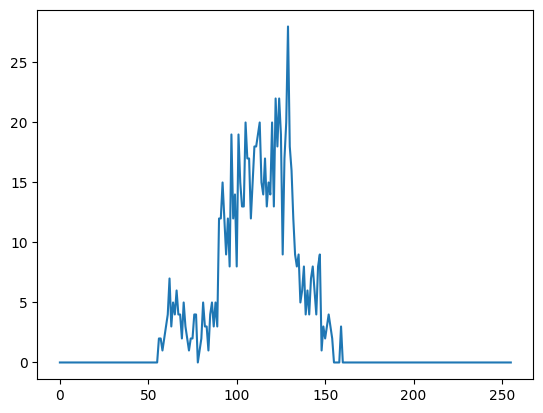

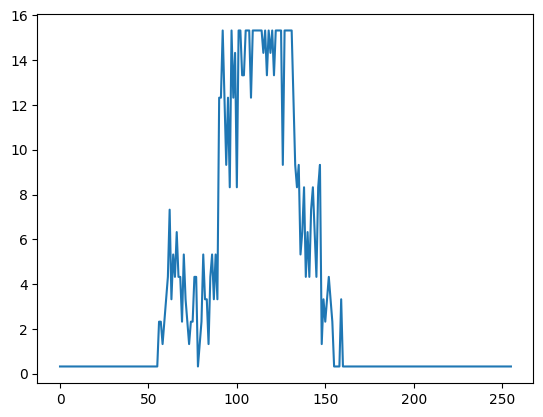

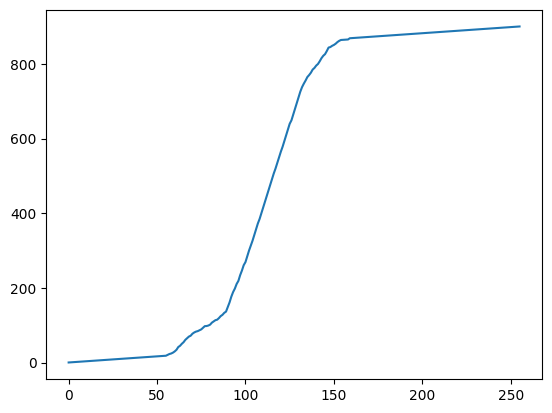

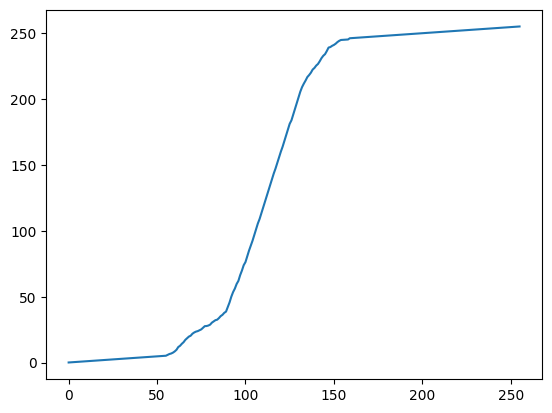

In [8]:
x = test6[20:50, 20:50].flatten()
x = histogram(x)
plt.plot(x)
plt.show()
x = limitted_histogram(x, 15)
plt.plot(x)
plt.show()
x = cdf(x)

plt.plot(x)
plt.show()

x = x * 255 / x[-1]

plt.plot(x)
plt.show()
